In [1]:
%matplotlib inline
import numpy as np
import os
from urllib import urlopen
from matplotlib import pyplot as plt
import pandas
from datetime import datetime

# Save the exoplanet.org database to the directory that this file is saved in
exodbPath = os.path.dirname(os.path.abspath('.'))
csvDatabaseName = os.path.join(exodbPath,'exoplanets.csv')  

def lastupdate(path):
    t = os.path.getmtime(path)
    return datetime.fromtimestamp(t)

def download(csvDatabaseName=csvDatabaseName):
    '''
    If there's a previously archived database pickle in this current working 
    directory then use it, if not, grab the data from exoplanets.org in one big
    CSV file and make one. If the old archive is >14 days old, grab a fresh 
    version of the database from exoplanets.org.
    '''

    if not os.path.exists(csvDatabaseName):
        print 'No local copy of exoplanets.org database. Downloading one...'
        rawCSV = urlopen('http://www.exoplanets.org/csv-files/exoplanets.csv').read()
        saveCSV = open(csvDatabaseName,'w')
        saveCSV.write(rawCSV)
        saveCSV.close()
    else: 
        #If the local copy of the exoplanets.org database is >14 days old, 
        #download a new one
        timesincemod = datetime.now() - lastupdate(csvDatabaseName)
        Ndays = 7
        if timesincemod.days > Ndays:
            print('Your local copy of the exoplanets.org database is' + 
                  ' >{0} days old. Downloading a fresh one...'.format(Ndays))
            rawCSV = urlopen(
                  'http://www.exoplanets.org/csv-files/exoplanets.csv').read()
            saveCSV = open(csvDatabaseName,'w')
            saveCSV.write(rawCSV)
            saveCSV.close()
        else: 
            print('Your local copy of the exoplanets.org database is' + 
                  " <{0} days old. That'll do...".format(Ndays))
    return pandas.read_csv(csvDatabaseName)

def plottimestamp(axis, csvDatabaseName=csvDatabaseName, **kwargs):
    '''
    Add annotation to `axis` with the date of last exoplanets.org access
    '''
    t = lastupdate(csvDatabaseName).strftime('%Y-%m-%d')
    note = 'exoplanets.org\n{0}'.format(t)
    axis.annotate(note, xy=(0.02, 0.98), xycoords='axes fraction',
                  va='top', ha='left')

# Download/load exoplanets.org database
db = download()

# Filter out the calculated values -- use empirical measurements only
#Mp_measured = db.MASSREF != 'estimated from radius; see EOD documentation'
#Rp_measured = (~db.RREF.isnull()) & (db.RREF != 'Calculated')

Your local copy of the exoplanets.org database is <7 days old. That'll do...


/Users/bmorris/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (4,5,10,11,17,18,23,24,26,27,30,33,38,39,44,45,50,51,56,57,62,63,70,71,73,74,79,80,81,82,88,89,95,96,105,106,109,110,115,116,124,125,130,131,137,143,144,149,150,159,160,161,162,172,173,174,179,180,182,188,189,195,196,201,202,205,206,211,212,217,218,223,224,229,230,235,236,241,242,247,248,253,254,259,260,265,266,268,269,270,271,273,278,279,284,285,290,291,294,295,301,302,304,305,310,311) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


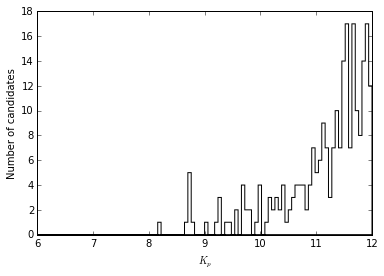

In [21]:
# Find targets in Kepler planet database, and have Kepler magnitudes
kepler_only = (db.KDE == True) & (~db.KP.isnull())

fig, ax = plt.subplots()
ax.hist(db[kepler_only].KP.values, 100, histtype='stepfilled',
           color='w', range=[6,12])
ax.set_ylabel('Number of candidates')
ax.set_xlabel('$K_p$')
plt.show()